# Retrieving OpenStreetMap data

![](img/OSM_logo.png)

## What is OpenStreetMap?

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment.
It contains data for example about streets, buildings, different services, and landuse to mention a few. You can view the map at www.openstreetmap.org. You can also sign up as a contributor if you want to edit the map. More details about OpenStreetMap and its contents are available in the [OpenStreetMap Wiki](https://wiki.openstreetmap.org/wiki/Main_Page).

OSM has a large userbase with more than 4 million users and over a million contributers that update actively the OSM database with 3 million changesets per day. In total OSM contains 5 billion nodes and counting! ([stats from November 2019](http://wiki.openstreetmap.org/wiki/Stats)).

OpenStreetMap is used not only for integrating the **OSM maps** as background maps to visualizations or online maps, but also for many other purposes such as **routing**, **geocoding**, **education**, and **research**. OSM is also widely used for humanitarian response e.g. in crisis areas (e.g. after natural disasters) and for fostering economic development. Read more about humanitarian projects that use OSM data from the [Humanitarian OpenStreetMap Team (HOTOSM) website](https://www.hotosm.org).


## Main tools in this lesson

### OSMnx

This week we will explore a Python module called [OSMnx](https://github.com/gboeing/osmnx)
that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services. It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called [NetworkX](https://networkx.github.io/documentation/stable/).

To get an overview of the capabilities of the package, see an introductory video given by the lead developer of the package, Prof. Geoff Boeing: ["Meet the developer: Introduction to OSMnx package by Geoff Boeing"](https://www.youtube.com/watch?v=Q0uxu25ddc4&list=PLs9D4XVqc6dCAhhvhZB7aHGD8fCeCC_6N).

There is also a scientific article available describing the package:

> Boeing, G. 2017. ["OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks."](https://www.researchgate.net/publication/309738462_OSMnx_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks) Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004


[This tutorial](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb) provides a practical overview of OSMnx functionalities, and has also inspired this AutoGIS lesson.

*Note: major changes were implemented in OSMnx versions > 0.9. This lesson has been updated accordingly.*

</div>

### NetworkX

We will also use [NetworkX](https://networkx.github.io/documentation/stable/) to for manipulating and analyzing the street network data retrieved from OpenSTreetMap. NetworkX is a Python package that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks. Networkx module contains algorithms that can be used to calculate [shortest paths](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html)
along road networks using e.g. [Dijkstra's](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) or [A\* algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm).

## Download and visualize OpenStreetMap data with OSMnx

One the most useful features that OSMnx provides is an easy-to-use way of retrieving [OpenStreetMap](http://www.openstreetmap.org) data using [OverPass API](http://wiki.openstreetmap.org/wiki/Overpass_API) in the background. In this tutorial, we will learn how to download and visualize the street network and additional data from OpenStreetMap covering a specified area of interest.

### Street network

The [osmnx.graph -module](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph_from#module-osmnx.graph) enables downloading and constructing a routable road network graph based on user-defined area of interest. The user can specify the area of interest, for example using a placename, a bounding box or a polygon. Here, we will use a placename for fetching data from the Kamppi area in Helsinki, Finland. In the place name query, OSMnx uses the Nominatim Geocoding API.

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

Let's start by specifying ``"Kamppi, Helsinki, Finland"`` as the place from where the data should be downloaded. The place name should be *geocodable* which means that the place name should exist in the OpenStreetMap database (you can do a test search at https://www.openstreetmap.org/ or at https://nominatim.openstreetmap.org/ to verify that the place name is valid).  

In [2]:
# Specify the name that is used to seach for the data
place_name = 'Kamppi, Helsinki, Finland'

Next, we will read in the OSM street network using OSMnx using the [graph_from_place](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=graph%20from#osmnx.graph.graph_from_place) function:

In [3]:
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

Check the data type of the graph:

In [4]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

What we have here is a networkx [MultiDiGraph](https://networkx.org/documentation/networkx-1.10/reference/classes.multidigraph.html) object. 

Let's have a closer look a the street nework. OSMnx has its own function [plot_graph()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=plot_graph#osmnx.plot.plot_graph) for visualizing graph objects. The function utilizes Matplotlib for visualizing the data,
hence as a result it returns a matplotlib figure and axis objects:


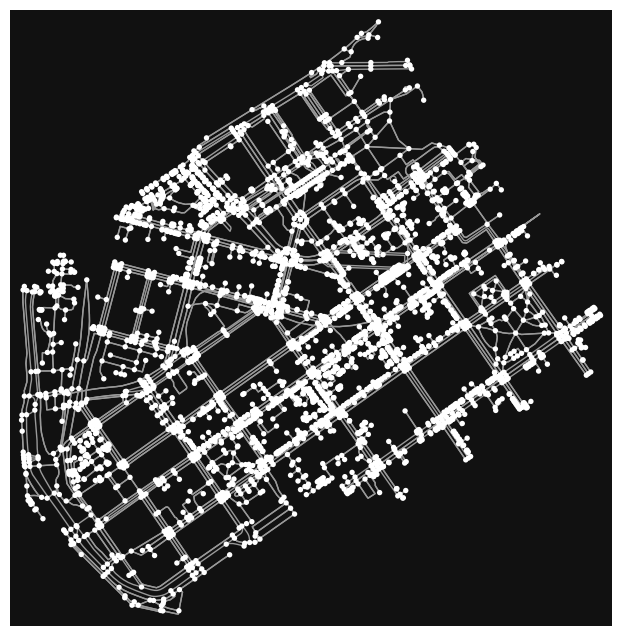

In [5]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

Great! Now we can see that our graph contains nodes (the points) and edges (the lines) that connects those nodes to each other.


### Graph to GeoDataFrame

We can now plot all these different OSM layers by using the familiar `plot()` function of geopandas. As you might remember, the street network data is not a GeoDataFrame, but a graph object. Luckily, OSMnx provides a convenient function `graph_to_gdfs()` that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edge.

Let's extract the nodes and edges from the graph as GeoDataFrames:

In [6]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

In [7]:
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
25216594,60.164794,24.921057,5,NaN,NaN,POINT (24.92106 60.16479)
25238874,60.163665,24.921028,4,NaN,NaN,POINT (24.92103 60.16366)
25238883,60.163452,24.921441,4,crossing,NaN,POINT (24.92144 60.16345)
25238933,60.161114,24.924529,3,NaN,NaN,POINT (24.92453 60.16111)
25238937,60.160860,24.925861,3,NaN,NaN,POINT (24.92586 60.16086)


In [8]:
edges.head()

osmid  oneway lanes            name   highway   
u        v          key                                                      
25216594 1372425721 0     23717777    True     2   Porkkalankatu   primary  \
         1372425714 0     23856784    True     2  Mechelininkatu   primary   
25238874 336192701  0     29977177    True     3  Mechelininkatu   primary   
         1519889266 0    930820886    True     1    Itämerenkatu  tertiary   
25238883 568147264  0     58077048    True     4  Mechelininkatu   primary   

                        maxspeed reversed  length   
u        v          key                             
25216594 1372425721 0         40    False  10.404  \
         1372425714 0         40    False  40.885   
25238874 336192701  0         40    False   5.843   
         1519889266 0         30    False  10.879   
25238883 568147264  0         40    False  15.388   

                                                                  geometry   
u        v          key                                                      
25216594 1372425721 0    LINESTRING (24.92106 60.16479, 24.92087 60.16479)  \
         1372425714 0    LINESTRING (24.92106 60.16479, 24.92095 60.164...   
25238874 336192701  0    LINESTRING (24.92103 60.16366, 24.92104 60.16361)   
         1519889266 0    LINESTRING (24.92103 60.16366, 24.92083 60.16366)   
25238883 568147264  0    LINESTRING (24.92144 60.16345, 24.92140 60.16359)   

                        junction tunnel access bridge service width  
u        v          key                                              
25216594 1372425721 0        NaN    NaN    NaN    NaN     NaN   NaN  
         1372425714 0        NaN    NaN    NaN    NaN     NaN   NaN  
25238874 336192701  0        NaN    NaN    NaN    NaN     NaN   NaN  
         1519889266 0        NaN    NaN    NaN    NaN     NaN   NaN  
25238883 568147264  0        NaN    NaN    NaN    NaN     NaN   NaN

Nice! Now, as we can see, we have our graph as GeoDataFrames and we can plot them using the same functions and tools as we have used before.

### Place polygon

Let's also plot the Polygon that represents our area of interest (Kamppi, Helsinki). We can retrieve the Polygon geometry using the [geocode_to_gdf()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf(#osmnx.geocoder.geocode_to_gdf)) -function.

In [9]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

As the name of the function already tells us, it returns a GeoDataFrame object based on the specified place name query.
Let's still verify the data type: 

In [10]:
# Check the data type
type(area)

geopandas.geodataframe.GeoDataFrame

Let's also have a look at the data:

In [11]:
# Check data values
area.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((24.92064 60.16483, 24.92069 60.16447...",60.172075,60.160469,24.943453,24.920643,297571232,relation,184714,60.168535,24.930494,"Kamppi, Southern major district, Helsinki, Hel...",boundary,administrative,0.760313


<Axes: >

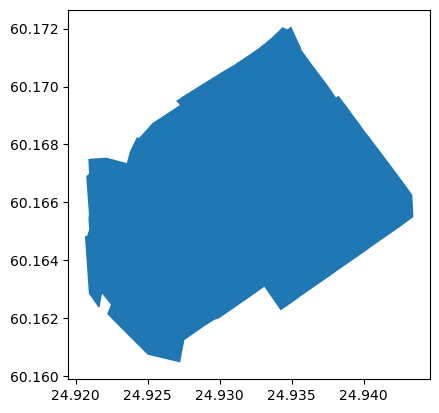

In [12]:
# Plot the area:
area.plot()

### Building footprints

It is also possible to retrieve other types of OSM data features with OSMnx such as buildings or points of interest (POIs). Let's download the buildings with `OSMnx` [geometries_from_place()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geometries_from_place#osmnx.geometries.geometries_from_place) -function and plot them on top of our street network in Kamppi. 

When fetching spesific types of geometries from OpenStreetMap using OSMnx `geometries_from_place` we also need to specify the correct tags. For getting [all types of buildings](https://wiki.openstreetmap.org/wiki/Buildings), we can use the tag `building=yes`.

In [13]:
# List key-value pairs for tags
tags = {"building": True}

In [14]:
buildings = ox.geometries_from_place(place_name, tags)

Let's check how many building footprints we received:

In [15]:
len(buildings)

449

Let's also have a look at the data:

In [16]:
buildings.head()

ele                                           geometry   
element_type osmid                                                              
way          8035238   NaN  POLYGON ((24.93563 60.17045, 24.93557 60.17054...  \
             8042297   NaN  POLYGON ((24.92938 60.16795, 24.92933 60.16797...   
             14797170  NaN  POLYGON ((24.92427 60.16648, 24.92427 60.16650...   
             14797171  NaN  POLYGON ((24.92390 60.16729, 24.92391 60.16731...   
             14797172  NaN  POLYGON ((24.92647 60.16689, 24.92648 60.16689...   

                      amenity          operator wheelchair  source access   
element_type osmid                                                          
way          8035238      NaN               NaN        NaN     NaN    NaN  \
             8042297      NaN               NaN        NaN     NaN    NaN   
             14797170     NaN  City of Helsinki        NaN  survey    NaN   
             14797171     NaN               NaN        NaN  survey    NaN   
             14797172     NaN               NaN        NaN  survey    NaN   

                      addr:housenumber      addr:street addr:unit  ...   
element_type osmid                                                 ...   
way          8035238             22-24  Mannerheimintie       NaN  ...  \
             8042297                 2   Runeberginkatu       NaN  ...   
             14797170               10  Lapinlahdenkatu       NaN  ...   
             14797171              NaN              NaN       NaN  ...   
             14797172                2       Lapinrinne       NaN  ...   

                      lippakioski wikimedia_commons addr:floor covered area   
element_type osmid                                                            
way          8035238          NaN               NaN        NaN     NaN  NaN  \
             8042297          NaN               NaN        NaN     NaN  NaN   
             14797170         NaN               NaN        NaN     NaN  NaN   
             14797171         NaN               NaN        NaN     NaN  NaN   
             14797172         NaN               NaN        NaN     NaN  NaN   

                      leisure ways type electrified nohousenumber  
element_type osmid                                                 
way          8035238      NaN  NaN  NaN         NaN           NaN  
             8042297      NaN  NaN  NaN         NaN           NaN  
             14797170     NaN  NaN  NaN         NaN           NaN  
             14797171     NaN  NaN  NaN         NaN           NaN  
             14797172     NaN  NaN  NaN         NaN           NaN  

[5 rows x 114 columns]

As you can see, there are several columns in the buildings-layer. Each column contains information about a spesific tag that OpenStreetMap contributors have added. Each tag consists of a key (the column name), and several potential values (for example `building=yes` or `building=school`). Read more about tags and tagging practices in the [OpenStreetMap wiki](https://wiki.openstreetmap.org/wiki/Tags). 

In [17]:
buildings.columns

Index(['ele', 'geometry', 'amenity', 'operator', 'wheelchair', 'source',
       'access', 'addr:housenumber', 'addr:street', 'addr:unit',
       ...
       'lippakioski', 'wikimedia_commons', 'addr:floor', 'covered', 'area',
       'leisure', 'ways', 'type', 'electrified', 'nohousenumber'],
      dtype='object', length=114)

### Points-of-interest

It is also possible to retrieve other types of geometries from OSM using the `geometries_from_place` by passing different tags. Point-of-interest (POI) is a generic concept that describes point locations that represent places of interest. 

In OpenStreetMap, many POIs are described using the [amenity-tags](https://wiki.openstreetmap.org/wiki/Key:amenityhttps://wiki.openstreetmap.org/wiki/Key:amenity). 
We can, for excample, retrieve all restaurat locations by referring to the tag `amenity=restaurant`. See all available amenity categories from [OSM wiki](https://wiki.openstreetmap.org/wiki/Key:amenity). 

*Note: We used the `pois_from_place()` method to retrieve POIs in older versions of OSMnx.*

Let's retrieve restaurants that are located in our area of interest:

In [18]:
# List key-value pairs for tags
tags = {"amenity" : "restaurant"}

In [19]:
# Retrieve restaurants
restaurants = ox.geometries_from_place(place_name, tags)

# How many restaurants do we have?
len(restaurants)

175

As we can see, there are quite many restaurants in the area.

Let's explore what kind of attributes we have in our restaurants GeoDataFrame:

In [20]:
# Available columns
restaurants.columns

Index(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'amenity', 'cuisine', 'diet:halal', 'diet:kosher',
       'name', 'payment:credit_cards', 'payment:debit_cards', 'phone',
       'website', 'wheelchair', 'geometry', 'email', 'facebook',
       'opening_hours', 'short_name', 'start_date', 'toilets:wheelchair',
       'delivery:covid19', 'opening_hours:covid19', 'takeaway:covid19',
       'diet:vegetarian', 'fixme', 'name:fi', 'name:zh', 'payment:cash',
       'diet:vegan', 'contact:phone', 'contact:website', 'source',
       'outdoor_seating', 'addr:housename', 'level', 'address',
       'access:covid19', 'drive_through:covid19', 'takeaway', 'delivery',
       'url', 'lunch:menu', 'note', 'reservation', 'room', 'contact:facebook',
       'indoor_seating', 'opening_hours:brunch', 'toilets', 'capacity',
       'smoking', 'access:dog', 'operator', 'shop', 'alt_name',
       'contact:email', 'established', 'description', 'diet:non-vegetarian',
  

As you can see, there is quite a lot of (potential) information related to the amenities. Let's subset the columns and inspect the data further. Useful columns include at least `name`, `address information` and `opening_hours` information:

In [21]:
# Select some useful cols and print
cols = ['name', 'opening_hours', 'addr:city', 'addr:country', 
        'addr:housenumber', 'addr:postcode', 'addr:street']

# Print only selected cols
restaurants[cols].head()

name   
element_type osmid                               
node         60062502                   Kabuki  \
             62965963  Restaurant & Bar Fusion   
             76617692             Johan Ludvig   
             76624339                  Shinobi   
             76624351                   Pueblo   

                                              opening_hours addr:city   
element_type osmid                                                      
node         60062502                                   NaN  Helsinki  \
             62965963    Mo-Th 11-22; Fr-Sa 11-02; Su 12-20       NaN   
             76617692                                   NaN  Helsinki   
             76624339  We-Th 17:00-23:00; Fr-Sa 16:00-24:00  Helsinki   
             76624351                                   NaN  Helsinki   

                      addr:country addr:housenumber addr:postcode   
element_type osmid                                                  
node         60062502           FI               12         00180  \
             62965963          NaN              NaN           NaN   
             76617692           FI              NaN           NaN   
             76624339           FI               38         00120   
             76624351           FI              NaN           NaN   

                           addr:street  
element_type osmid                      
node         60062502  Lapinlahdenkatu  
             62965963              NaN  
             76617692              NaN  
             76624339     Albertinkatu  
             76624351      Eerikinkatu

As we can see, there is a lot of useful information about restaurants that can be retrieved easily with OSMnx. Also, if some of the information need updating, you can go over to www.openstreetmap.org and edit the source data! :)

### Plotting the data

Let's create a map out of the streets, buildings, restaurants, and the area Polygon but let's exclude the nodes (to keep the figure clearer).

In [22]:
import contextily as ctx

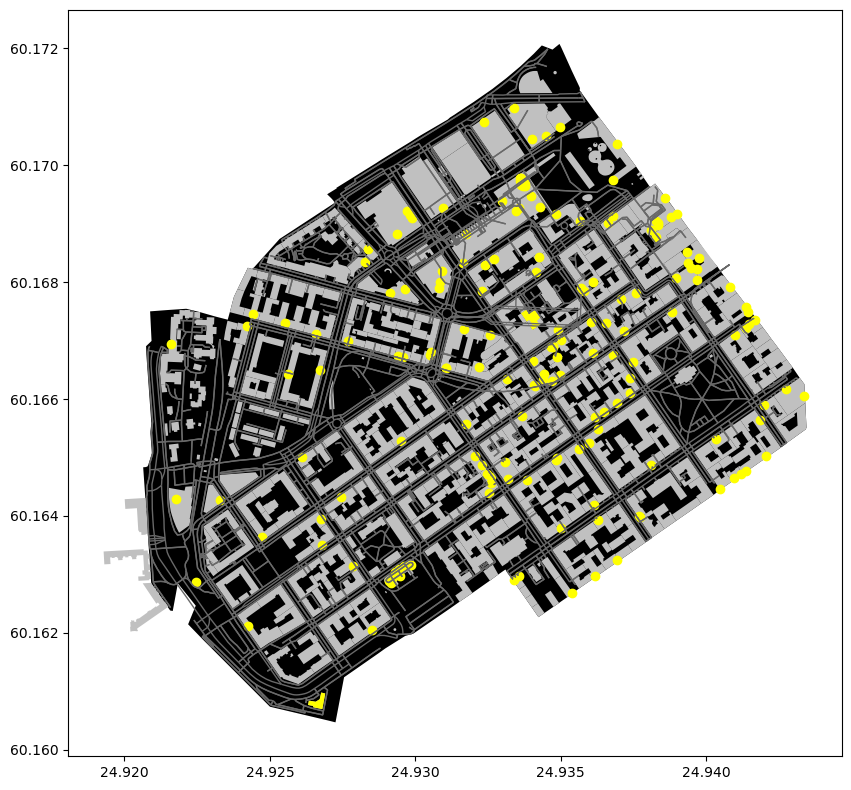

In [23]:
fig, ax = plt.subplots(figsize=(10,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, edgecolor='dimgray', linewidth=1)

# Plot buildings
buildings.plot(ax=ax, facecolor='silver')

# Plot restaurants
restaurants.plot(ax=ax, color='yellow')

plt.tight_layout()

#ctx.add_basemap(ax, crs=area.crs, source=ctx.providers.CartoDB.Positron)


In [25]:
#convert to geojson
restaurants_json = restaurants.to_json()
buildings_json = buildings.to_json()
edges_json = edges.to_json()
area_json = area.to_json()

In [27]:
from keplergl import KeplerGl

k_map = KeplerGl()
k_map.add_data(data=buildings_json, name='Building')
k_map.add_data(data=edges_json, name='Edges')
k_map.add_data(data=restaurants_json, name='Restaurants')
k_map.add_data(data=area_json, name='Area')
#k_map.save_to_html(file_name='kepler_map.html')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to kepler_map.html!


Cool! Now we have a map where we have plotted the restaurants, buildings, streets and the boundaries of the selected region of 'Kamppi' in Helsinki. And all of this required only a few lines of code. Pretty neat! 


### Extra: Park polygons
Notice that we can retrieve all kinds of different features from OpenStreetMap using the [geometries_from_place()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geometries_from_place#osmnx.geometries.geometries_from_place) method by passing different OpenStreetMap tags.

Let's try to fetch all public parks in the Kamppi area. In OpenStreetMap, parks are often tagged as `leisure=park`. We can also add other green surfaces, such as `landuse=grass`. see OpenStreetMap, and OSM wiki for more details.

- We need to start by fetching all footprints from the tag `leisure`:

In [ ]:
# List key-value pairs for tags


In [ ]:
# Get the data


# Check the result


let's check the first rows:

Check all column headers:

plot the parks:

Finally, we can add the park polygons to our map:

In [ ]:
# Create a subplot object for plotting the layers onto a common map


# Plot the footprint

# Plot the parks


# Plot street edges


# Plot buildings

# Plot restaurants


<div class="alert alert-info">

**Check your understading**

Retrieve OpenStreetMap data from some other area! Download these elements using OSMnx functions from your area of interest:
    
- Extent of the area using `geocode_to_gdf()`
- Street network using `graph_from_place()`, and convert to gdf using `graph_to_gdfs()`
- Building footprints (and other geometries) using `geometries_from_place()` and appropriate tags.
    
*Note, the larger the area you choose, the longer it takes to retrieve data from the API! Use parameter `network_type=drive` to limit the graph query to filter out un-driveable roads.*

</div>

In [ ]:
# Specify the name that is used to seach for the data. Check that the place name is valid from https://nominatim.openstreetmap.org/ui/search.html
my_place = ""

In [ ]:
# Get street network


In [ ]:
# Get building footprints


In [ ]:
# Plot the data


### Advanced reading

If analyzing OpenStreetMap data over large areas, it is often more efficient and meaningful to download the data all at once, in stead of separate queries to the API. Such data dumps from OpenStreetMap are available in various file formats, OSM [Protocolbuffer Binary Format](https://wiki.openstreetmap.org/wiki/PBF_Format) (PBF) being one of them. Data extracts covering whole countries and continents are available at: https://download.geofabrik.de/europe.html

[Pyrosm](https://pyrosm.readthedocs.io/en/latest/) is a python package developed for reading OpenStreetMap from PBF -files into Geopandas GeoDataFrames. Pyrosm makes it easy to extract road networks, buildings, Points of Interest (POI), landuse, natural elements, administrative boundaries and much more - similar to osmnx but more efficient when analyzing data covering large areas of interest. While osmnx reads the data from the Overpass API, pyrosm reads the data from a .pbf file that can be located on your local computer (faster!). 

Read more about fetching and using pbf files as a source for analyzing OpenStreetMap data in Python from the [pyrosm documentation](https://pyrosm.readthedocs.io/en/latest/basics.html#protobuf-file-what-is-it-and-how-to-get-one).